# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
import plotnine
from plotnine import *

In [2]:
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [3]:
# selecting age
# if we wanted to specifiy rows (all in this case)
df_titanic.loc[:, "age"]

0       42.0
1       13.0
2       16.0
3       39.0
4       16.0
        ... 
2202    41.0
2203    40.0
2204    32.0
2205    20.0
2206    26.0
Name: age, Length: 2207, dtype: float64

In [4]:
# simple column access
df_titanic["age"]

0       42.0
1       13.0
2       16.0
3       39.0
4       16.0
        ... 
2202    41.0
2203    40.0
2204    32.0
2205    20.0
2206    26.0
Name: age, Length: 2207, dtype: float64

In [5]:
# list of columns, nested list
df_titanic[["age", "fare"]]

,age,fare
0,42.0,7.11
1,13.0,20.05
2,16.0,20.05
3,39.0,20.05
4,16.0,7.13
...,...,...
2202,41.0,NaN
2203,40.0,NaN
2204,32.0,NaN
2205,20.0,NaN


In [6]:
# columns become attributes of dataframes
df_titanic.age

0       42.0
1       13.0
2       16.0
3       39.0
4       16.0
        ... 
2202    41.0
2203    40.0
2204    32.0
2205    20.0
2206    26.0
Name: age, Length: 2207, dtype: float64

In [7]:
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


In [8]:
# select a specific row
df_titanic.loc[3, :]

name        Abbott, Mrs. Rhoda Mary 'Rosa'
gender                              female
age                                   39.0
class                                  3rd
embarked                                 S
country                            England
ticketno                            2673.0
fare                                 20.05
survived                                 1
Name: 3, dtype: object

In [9]:
# iloc does the same, but absolutely position based, doesn't support slicing, or boolean comparisons
df_titanic.iloc[3, :]

name        Abbott, Mrs. Rhoda Mary 'Rosa'
gender                              female
age                                   39.0
class                                  3rd
embarked                                 S
country                            England
ticketno                            2673.0
fare                                 20.05
survived                                 1
Name: 3, dtype: object

In [10]:
# when filtering, we can use boolean masking, only select rows where condition is true
df_titanic["age"] > 30

0        True
1       False
2       False
3        True
4       False
        ...  
2202     True
2203     True
2204     True
2205    False
2206    False
Name: age, Length: 2207, dtype: bool

In [11]:
# what if we want to treat it as its own df and select specific columns?
df_titanic[df_titanic["age"] > 30][["age", "fare"]]

,age,fare
0,42.0,7.1100
3,39.0,20.0500
12,40.0,9.0906
15,35.0,13.0000
21,39.0,8.0100
...,...,...
2197,37.0,NaN
2200,40.0,NaN
2202,41.0,NaN
2203,40.0,NaN


In [12]:
# combining conditions
df_titanic[(df_titanic["age"] > 30) & (df_titanic["gender"] == "female")]

,name,gender,age,class,embarked,country,ticketno,fare,survived
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
12,"Ahlin, Mrs. Johanna Persdotter",female,40.0,3rd,S,Sweden,7546.0,9.0906,0
35,"Andersson, Miss. Ida Augusta Margareta",female,38.0,3rd,S,Sweden,347091.0,7.1506,0
40,"Andersson, Mrs. Alfrida Konstantia Brogren",female,39.0,3rd,S,Sweden,347082.0,31.0506,0
44,"Andrews, Miss. Kornelia Theodosia",female,62.0,1st,C,United States,13502.0,77.1902,1
...,...,...,...,...,...,...,...,...,...
1997,"Robinson, Mrs. Annie",female,41.0,victualling crew,S,England,NaN,NaN,1
2059,"Smith, Miss. Katherine Elizabeth",female,45.0,victualling crew,S,England,NaN,NaN,1
2076,"Stap, Miss. Sarah Agnes",female,47.0,victualling crew,S,England,NaN,NaN,1
2143,"Wallis, Mrs. Catherine Jane",female,36.0,victualling crew,S,England,NaN,NaN,0


In [13]:
df_titanic[(df_titanic["age"] < 20) & (df_titanic["survived"] == 1) & (df_titanic["gender"] == "male")]["name"]

13                    Aks, Master. Frank Philip
22               Allison, Master. Hudson Trevor
58            Asplund, Master. Edvin Rojj Felix
62                   Asplund, Mr. Johan Charles
104                  Becker, Master. Richard F.
183               Caldwell, Master. Alden Gates
206         Carter, Master. William Thornton II
244                          Cohen, Mr. Gurshon
274              Coutts, Master. Neville Leslie
275                Coutts, Master. William Loch
304              Davies, Master. John Morgan jr
315                  Dean, Master. Bertram Vere
338                   Dodge, Master. Washington
344                  Dorking, Mr. Edward Arthur
353               Drew, Master. Marshall Brines
457       Goldsmith, Master. Frank John William
491     Hämäläinen, Master. Viljo Unto Johannes
613             Johnson, Master. Harold Theodor
761               Mallet, Master. André Clement
764                     Māmā, Mr. Hannā Mikā'īl
782                McCormack, Mr. Thomas

In [14]:
# sort by column: sort_values
df_titanic.sort_values(by = ["age", "name"], ascending=[False, True])

# # reassign to new dataframe to preserve sorting
# df_titanic_sorted = df_titanic.sort_values(by = "age", ascending=False)

,name,gender,age,class,embarked,country,ticketno,fare,survived
1176,"Svensson, Mr. Johan",male,74.000000,3rd,S,Sweden,347060.0,7.1506,0
820,"Mitchell, Mr. Henry Michael",male,72.000000,2nd,S,England,24580.0,10.1000,0
53,"Artagaveytia, Mr. Ramon",male,71.000000,1st,C,Argentina,17609.0,49.1001,0
456,"Goldschmidt, Mr. George B.",male,71.000000,1st,C,United States,17754.0,34.1301,0
282,"Crosby, Captain. Edward Gifford",male,70.000000,1st,S,United States,5735.0,71.0000,0
...,...,...,...,...,...,...,...,...,...
1182,"Tannūs, Master. As'ad",male,0.416667,3rd,C,Lebanon,2625.0,8.1004,1
296,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.333333,3rd,S,Sweden,347080.0,14.0800,0
316,"Dean, Miss. Elizabeth Gladys 'Millvina'",female,0.166667,3rd,S,England,2315.0,20.1106,1
439,"Gheorgheff, Mr. Stanio",male,NaN,3rd,C,Bulgaria,349254.0,7.1711,0


In [15]:
#mutating columns
df_titanic["age"] = df_titanic["age"] / 10
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,4.2,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,1.3,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,1.6,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,3.9,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,1.6,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,4.1,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,4.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,3.2,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,2.0,restaurant staff,S,England,NaN,NaN,0


In [16]:
# vectorization: operation on the entire array without having to use loops.
#we can add a new column using info from that specific row,
#but we dont need to ensure the right rows are being used
df_titanic["age"] = df_titanic["age"] * 10
df_titanic["age_squared"] = df_titanic["age"] ** 2
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived,age_squared
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,1764.0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,169.0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,256.0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,1521.0
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,256.0
...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1,1681.0
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1,1600.0
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0,1024.0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0,400.0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [17]:


# Calculate the joint distribution (cross-tab)
passengers_only = df_titanic[df_titanic['class'].isin(["1st", "2nd", "3rd"])]
joint_distribution = pd.crosstab(passengers_only['class'], passengers_only['embarked'])

display(joint_distribution)

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [18]:
# Code here
# the conditional distribution of their class given where they embarked
# for each column, add up every row's value. then across the row, divide by the sum
print("Class given embarked")
conditional_distribution_class_given_embarked = joint_distribution.div(joint_distribution.sum(axis=0), axis=1)
display(conditional_distribution_class_given_embarked)

# the conditional distribution of where they embarked given their class
# Switch the axes
print("\nembarked given class")
conditional_distribution_embarked_given_class = joint_distribution.div(joint_distribution.sum(axis=1), axis=0)
display(conditional_distribution_embarked_given_class)

proportion_3rd_southampton = conditional_distribution_embarked_given_class.loc['3rd', 'S']
print(f"\nProportion of 3rd class passengers who embarked at Southampton: {proportion_3rd_southampton:.4f}")

proportion_southampton_3rd = conditional_distribution_class_given_embarked.loc['3rd', 'S']
print(f"Proportion of Southampton passengers who were in 3rd class: {proportion_southampton_3rd:.4f}")

Class given embarked


embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481



embarked given class


embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756



Proportion of 3rd class passengers who embarked at Southampton: 0.6968
Proportion of Southampton passengers who were in 3rd class: 0.5405


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

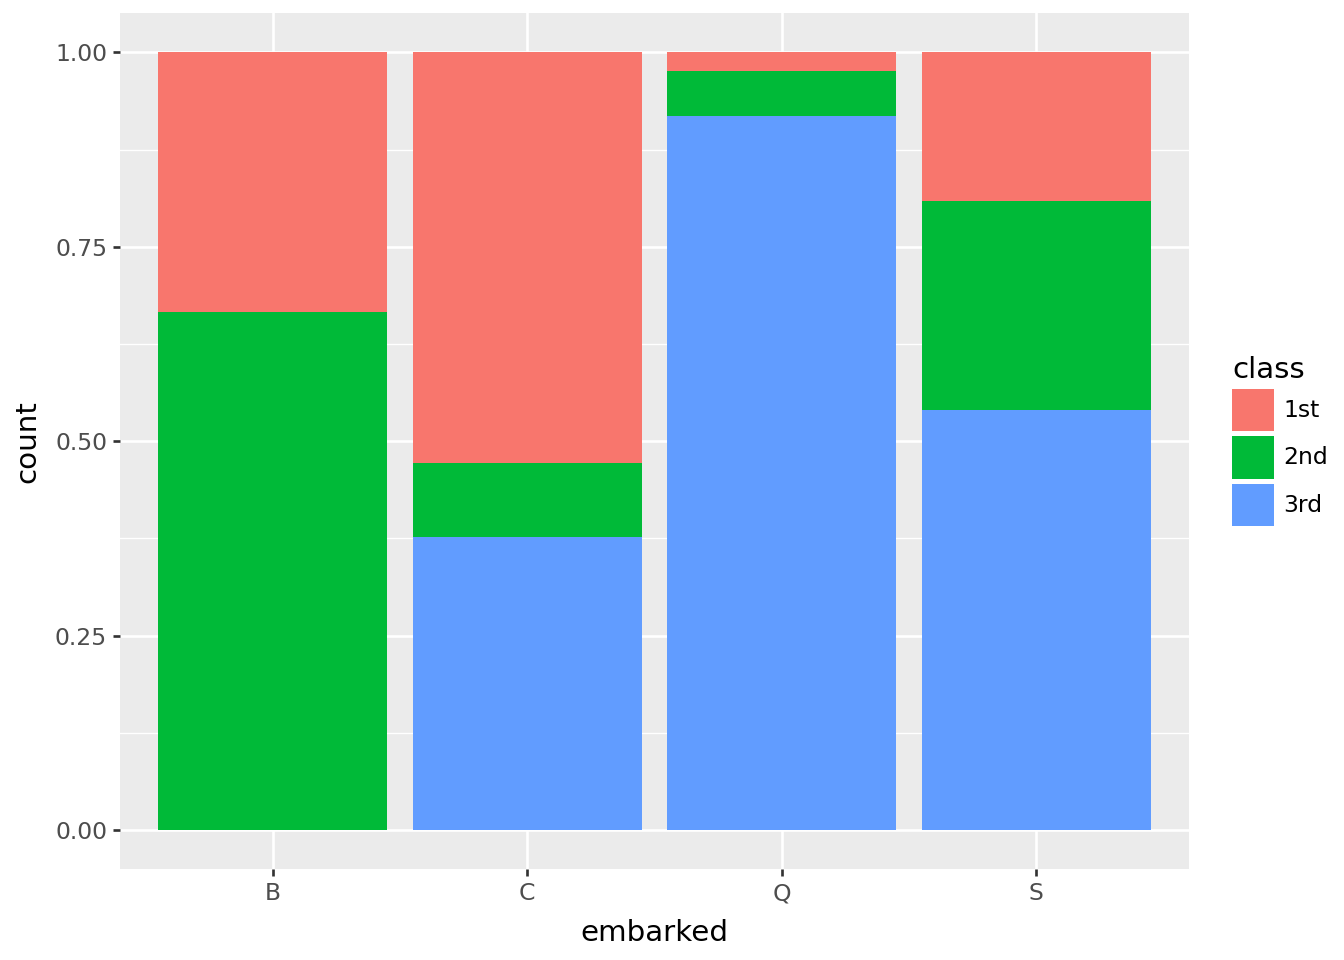

In [19]:
# Code here
(ggplot(passengers_only, aes(x = "embarked", fill = "class")) + geom_bar(position="fill"))